# Exploratory Data Analysis on Wine Quality Datasets

* **1. Introduction**
    * 1.1 About the data
    * 1.2 General information of the data
    * 1.3 Objective
* **2. Load and check data**
    * 2.1 Load data
    * 2.2 Outlier detection
    * 2.3 Check for null and missing values
* **3. Exploratory Data Analyisis**

## 1. Introduction

### 1.1 About the data

* Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc.
* All chemical properties of wines are continuous variables.
* Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best).
* Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### 1.2 General information of the data

**Type:** Two types of wines such as red wine and white wine.

**Fixed acidity:** Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic)


Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine, Acidity in food and drink tastes tart and zesty. Tasting acidity is also sometimes confused with alcohol. Wines with higher acidity feel lighter-bodied because they come across as “spritzy”. Reducing acids significantly might lead to wines tasting flat. If you prefer a wine that is richer and rounder, you enjoy slightly less acidity.

**Volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavour.


**Citric acid:** This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness.
Residual sugar: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped.


**Chlorides:** Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains.


**Free sulfur dioxide:** This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour.


**Total sulfur dioxide:** This is the sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.


**Density:** This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.


**pH:** Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


**Sulphates:** These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavour.


**Alcohol:** It's usually measured in % vol or alcohol by volume (ABV).


**Quality:** Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.


**Type:** Type of wine: Red wine or White wine

### 1.3 Objective

Prediction of Quality ranking from the chemical properties of the wines

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality

## 2. Load and Check Data

### 2.1 Load data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from scipy.stats.mstats import zscore

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [50]:
df = pd.read_csv('data/winequality.csv')

In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [52]:
df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

### 2.2 Outlier detection

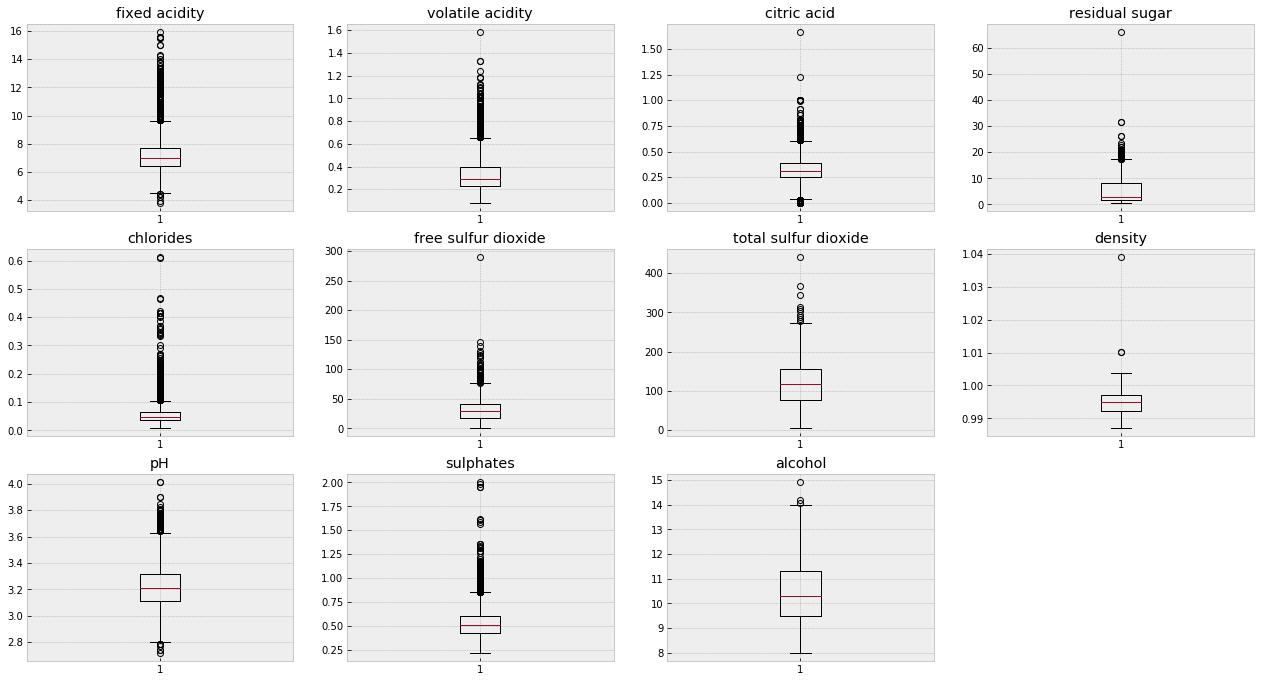

In [53]:
#make array of all variable except type
all_variables = [column for column in df]
all_variables.remove('type')

plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[all_variables[i]])
    plt.title(all_variables[i])

we can see that there are extreme value in especially in fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates.


In this case we need to remove the outlier.

According to http://www.mathwords.com/o/outliers.htm, we can calculate the outliers.


The formula tells us that any number that outside the range [Q1 - 1.5 * IQR, Q2+1.5*IQR] will be outliers

In [54]:
#Create Dataframe for each quality

types = df['type'].unique()

d = {type: df[df['type']== type] for type in types}

d['red']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [55]:
# Set the quantile
low = .25
high = .75

bounds = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'type'] # Remove 'Type' Column
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:]-  quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:-1] - 1.5*IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:-1] + 1.5*IQR
    quant_df.iloc[0,-1] = 0
    quant_df.iloc[1,-1] = 10
    bounds[type] = quant_df

bounds['red']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.25,3.95,0.015,-0.405,0.85,0.04,-14.0,-38.0,0.992248,2.925,0.28,7.1,0.0
0.75,12.35,1.015,0.915,3.65,0.12,42.0,122.0,1.001187,3.685,1.00,13.5,10.0


In [56]:
# remove the outliers from dataset

df_new = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'type'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[type].loc[low,x.name]) & (x < bounds[type].loc[high,x.name])], axis=0)
    df_new[type] = pd.concat([filt_df,d[type].loc[:,'type']], axis=1)

df_clean = result = pd.concat(df_new)
df_clean

fixed acidity  volatile acidity  citric acid  residual sugar  \
red   0               7.4              0.70         0.00             1.9   
      1               7.8              0.88         0.00             2.6   
      2               7.8              0.76         0.04             2.3   
      3              11.2              0.28         0.56             1.9   
      4               7.4              0.70         0.00             1.9   
...                   ...               ...          ...             ...   
white 6492            6.2              0.21         0.29             1.6   
      6493            6.6              0.32         0.36             8.0   
      6494            6.5              0.24         0.19             1.2   
      6495            5.5              0.29         0.30             1.1   
      6496            6.0              0.21         0.38             0.8   

            chlorides  free sulfur dioxide  total sulfur dioxide  density  \
red   0         0.076                 11.0                  34.0  0.99780   
      1         0.098                 25.0                  67.0  0.99680   
      2         0.092                 15.0                  54.0  0.99700   
      3         0.075                 17.0                  60.0  0.99800   
      4         0.076                 11.0                  34.0  0.99780   
...               ...                  ...                   ...      ...   
white 6492      0.039                 24.0                  92.0  0.99114   
      6493      0.047                 57.0                 168.0  0.99490   
      6494      0.041                 30.0                 111.0  0.99254   
      6495      0.022                 20.0                 110.0  0.98869   
      6496      0.020                 22.0                  98.0  0.98941   

              pH  sulphates  alcohol  quality   type  
red   0     3.51       0.56      9.4        5    red  
      1     3.20       0.68      9.8        5    red  
      2     3.26       0.65      9.8        5    red  
      3     3.16       0.58      9.8        6    red  
      4     3.51       0.56      9.4        5    red  
...          ...        ...      ...      ...    ...  
white 6492  3.27       0.50     11.2        6  white  
      6493  3.15       0.46      9.6        5  white  
      6494  2.99       0.46      9.4        6  white  
      6495  3.34       0.38     12.8        7  white  
      6496  3.26       0.32     11.8        6  white  

[6497 rows x 13 columns]

### 2.3 Check for null values

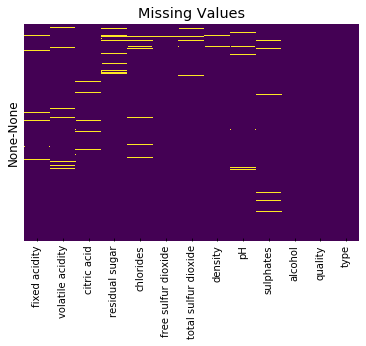

In [57]:
# Check for null values

sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.title('Missing Values');

## 3. Exploratory Data Analysis

### 3.1 Numerical data distribution

for this part lets look at the original distribution of all of the features by plotting them

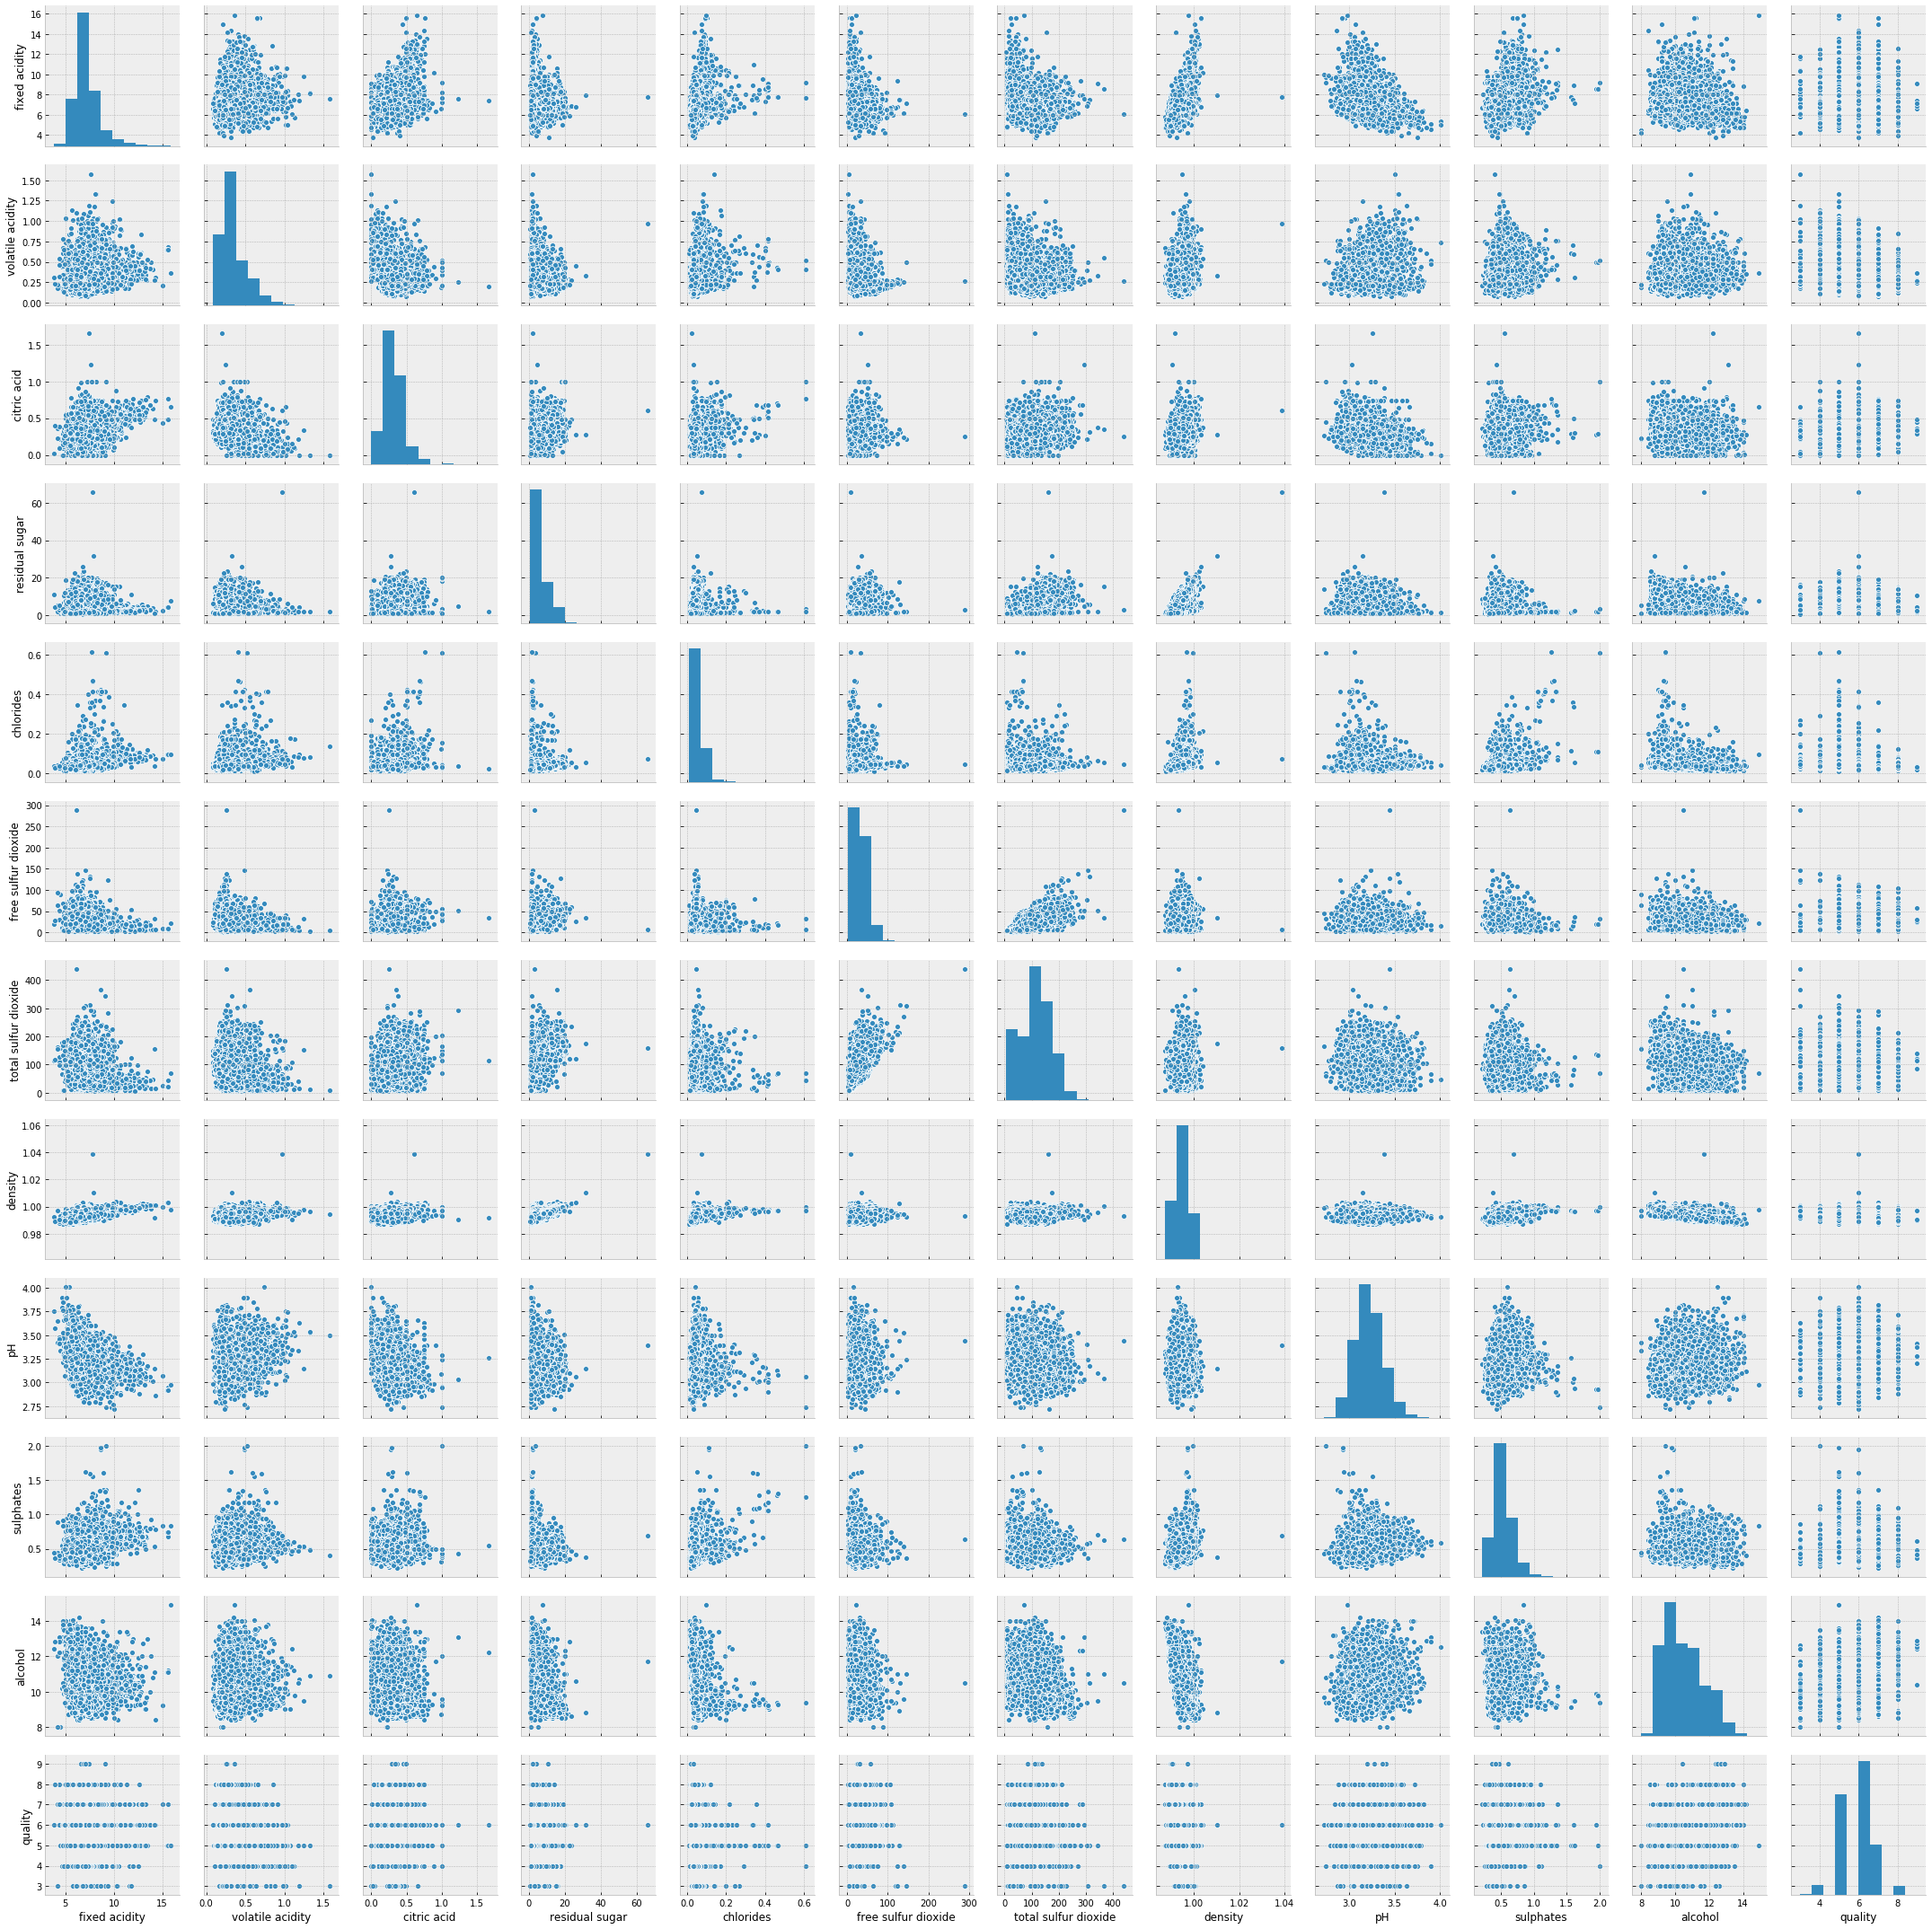

In [58]:
from scipy.stats import norm 

sns.pairplot(df);

### 3.2 Correlation

Let's see the correlation between variables of the cleaned data

In [61]:
corr_matrix = df_clean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

corr_list

Index(['quality', 'alcohol', 'density', 'chlorides', 'volatile acidity',
       'citric acid', 'free sulfur dioxide', 'fixed acidity', 'residual sugar',
       'sulphates', 'total sulfur dioxide', 'pH'],
      dtype='object')

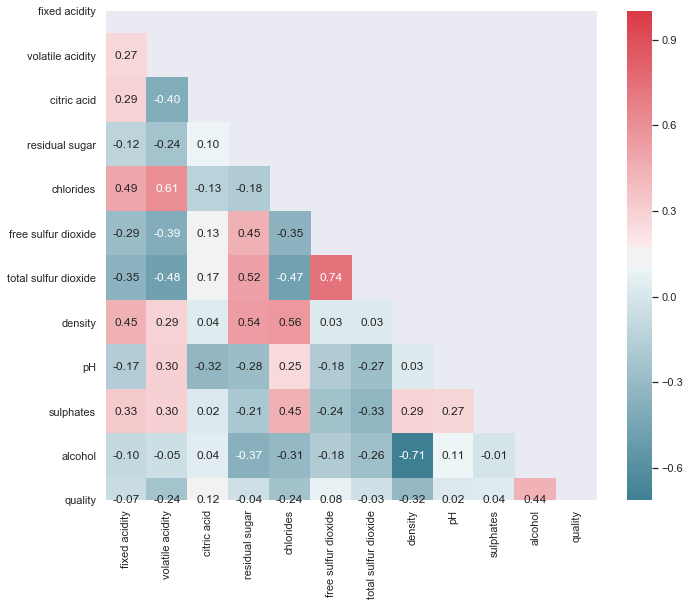

In [75]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf);



Wine quality has the highes correlation with alcohol. Other correlation degree are very low with each other. Such as citric acid, free sulfur dioxide, sulphates, and PH. Quality also has low negative correlation with density, violatile acidity, chlorides, fixed acidity, total sulfur dioxide.

#### Creating 2 Bins Model of Two Types of Wine Quality Classes

In [98]:
df_bins = df_clean.copy()

In [99]:
bins = [3, 4, 7, 9]

labels = ['low', 'medium', 'high'] #'low'=0, 'high'=1
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)


df_bins = df_bins.drop('quality', axis=1)
df_bins

fixed acidity  volatile acidity  citric acid  residual sugar  \
red   0               7.4              0.70         0.00             1.9   
      1               7.8              0.88         0.00             2.6   
      2               7.8              0.76         0.04             2.3   
      3              11.2              0.28         0.56             1.9   
      4               7.4              0.70         0.00             1.9   
...                   ...               ...          ...             ...   
white 6492            6.2              0.21         0.29             1.6   
      6493            6.6              0.32         0.36             8.0   
      6494            6.5              0.24         0.19             1.2   
      6495            5.5              0.29         0.30             1.1   
      6496            6.0              0.21         0.38             0.8   

            chlorides  free sulfur dioxide  total sulfur dioxide  density  \
red   0         0.076                 11.0                  34.0  0.99780   
      1         0.098                 25.0                  67.0  0.99680   
      2         0.092                 15.0                  54.0  0.99700   
      3         0.075                 17.0                  60.0  0.99800   
      4         0.076                 11.0                  34.0  0.99780   
...               ...                  ...                   ...      ...   
white 6492      0.039                 24.0                  92.0  0.99114   
      6493      0.047                 57.0                 168.0  0.99490   
      6494      0.041                 30.0                 111.0  0.99254   
      6495      0.022                 20.0                 110.0  0.98869   
      6496      0.020                 22.0                  98.0  0.98941   

              pH  sulphates  alcohol   type quality_range  
red   0     3.51       0.56      9.4    red        medium  
      1     3.20       0.68      9.8    red        medium  
      2     3.26       0.65      9.8    red        medium  
      3     3.16       0.58      9.8    red        medium  
      4     3.51       0.56      9.4    red        medium  
...          ...        ...      ...    ...           ...  
white 6492  3.27       0.50     11.2  white        medium  
      6493  3.15       0.46      9.6  white        medium  
      6494  2.99       0.46      9.4  white        medium  
      6495  3.34       0.38     12.8  white        medium  
      6496  3.26       0.32     11.8  white        medium  

[6497 rows x 13 columns]

#### Quality in DIfferent Wine Types

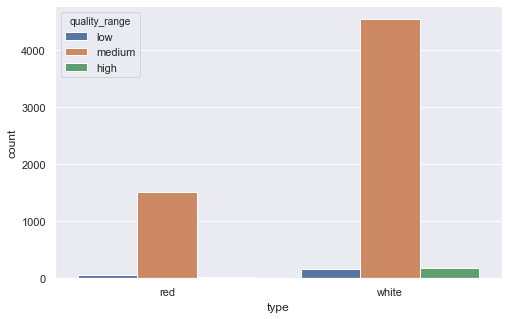

In [100]:
plt.figure(figsize=(8,5))

sns.countplot(x='type', hue='quality_range', data=df_bins)
plt.show()

#### Quality and Alcohol Relation

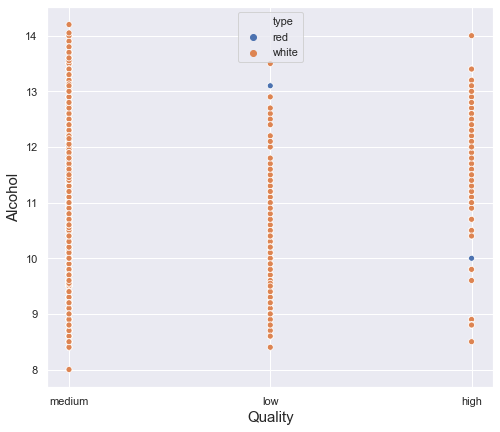

In [101]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

#### Chlorides Level in Quality and wine class

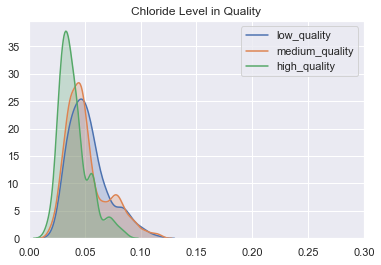

In [102]:
low_quality = df_bins[df_bins['quality_range']=='low']['chlorides']
medium_quality = df_bins[df_bins['quality_range']=='medium']['chlorides']
high_quality = df_bins[df_bins['quality_range']=='high']['chlorides']

ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)
ax = sns.kdeplot(data= medium_quality, label= 'medium_quality', shade=True, color=None)
ax = sns.kdeplot(data= high_quality, label= 'high_quality', shade=True, color=None)

plt.title("Chloride Level in Quality")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

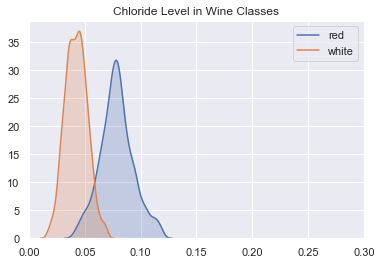

In [103]:
red = df_bins[df_bins['type']=='red']['chlorides']
white = df_bins[df_bins['type']=='white']['chlorides']

ax = sns.kdeplot(data= red, label= 'red', shade=True, color=None)
ax = sns.kdeplot(data= white, label= 'white', shade=True, color=None)

plt.title("Chloride Level in Wine Classes")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

Chloride level is a bit higher in red wine

#### Quality & Volatility Acidity by Types

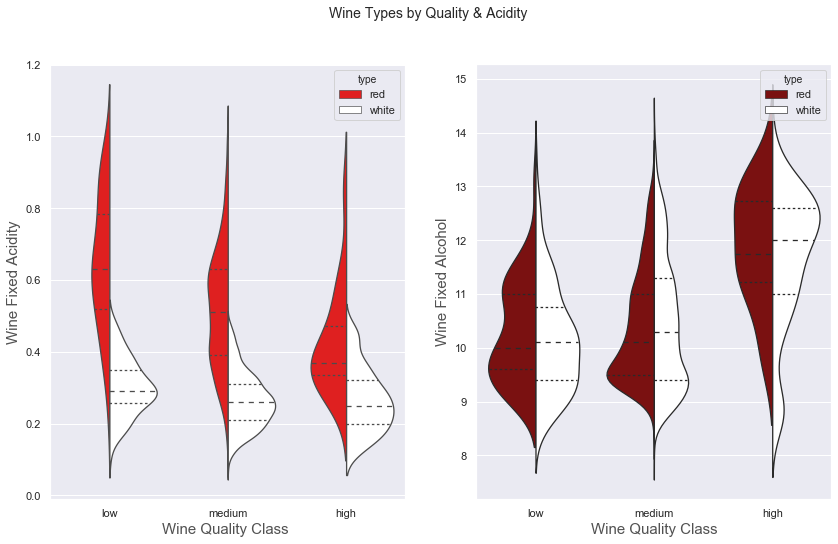

In [104]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

#create left violin plot
sns.violinplot(x='quality_range', y='volatile acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

#create right violin plot
sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)
plt.show()

Fixed acidity level is low on both wine classes, especially in white wine while red wine has more in low quality class up to 1.40. Fixed Alcohol is high on both wine class comparing on both quality. High quality wine has the highest fixed alcohol level in both wine class. High quality wine tend to have low Wine Fixed Acidity and High Fixed Alcohol

#### Fixed Acidity & Volatile Acidity & Citric Acid Density in Quality Classes

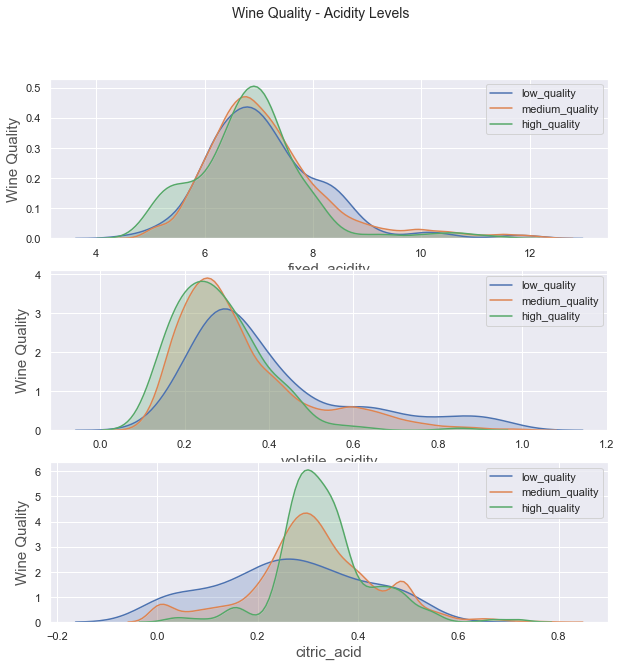

In [105]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)

fixed_acidity_low_quality = df_bins[df_bins['quality_range']=='low']['fixed acidity']
fixed_acidity_medium_quality = df_bins[df_bins['quality_range']=='medium']['fixed acidity']
fixed_acidity_high_quality = df_bins[df_bins['quality_range']=='high']['fixed acidity']

volatile_acidity_low_quality = df_bins[df_bins['quality_range']=='low']['volatile acidity']
volatile_acidity_medium_quality = df_bins[df_bins['quality_range']=='medium']['volatile acidity']
volatile_acidity_high_quality = df_bins[df_bins['quality_range']=='high']['volatile acidity']

citric_acid_low_quality = df_bins[df_bins['quality_range']=='low']['citric acid']
citric_acid_medium_quality = df_bins[df_bins['quality_range']=='medium']['citric acid']
citric_acid_high_quality = df_bins[df_bins['quality_range']=='high']['citric acid']

sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True, ax=ax1)
sns.kdeplot(data=fixed_acidity_medium_quality, label="medium_quality", shade=True, ax=ax1)
sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)
ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)

sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True, ax=ax2)
sns.kdeplot(data=volatile_acidity_medium_quality, label="medium_quality", shade=True, ax=ax2)
sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)
ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)

sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True, ax=ax3)
sns.kdeplot(data=citric_acid_medium_quality, label="medium_quality", shade=True, ax=ax3)
sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)
ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)
ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)

plt.legend()
plt.show()

#### Residual Sugar Levels by Wine Quality Classes

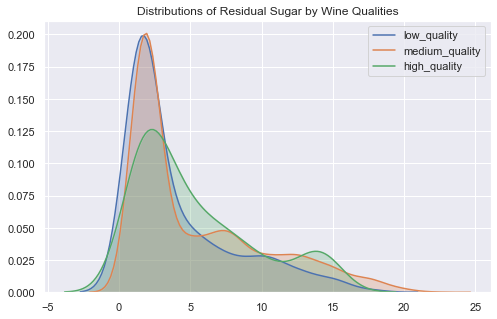

In [106]:
plt.figure(figsize=(8,5))

residual_sugar_low = df_bins[df_bins['quality_range']=='low']['residual sugar']
residual_sugar_medium = df_bins[df_bins['quality_range']=='medium']['residual sugar']
residual_sugar_high = df_bins[df_bins['quality_range']=='high']['residual sugar']

ax = sns.kdeplot(data=residual_sugar_low, label='low_quality', shade=True)
ax = sns.kdeplot(data=residual_sugar_medium, label='medium_quality', shade=True)
ax = sns.kdeplot(data=residual_sugar_high, label='high_quality', shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")
plt.legend()
plt.show()

#### Sulfur Dioxide Distribution in Wine Quality Classes

Text(0, 0.5, 'free_sulfur_dioxide')

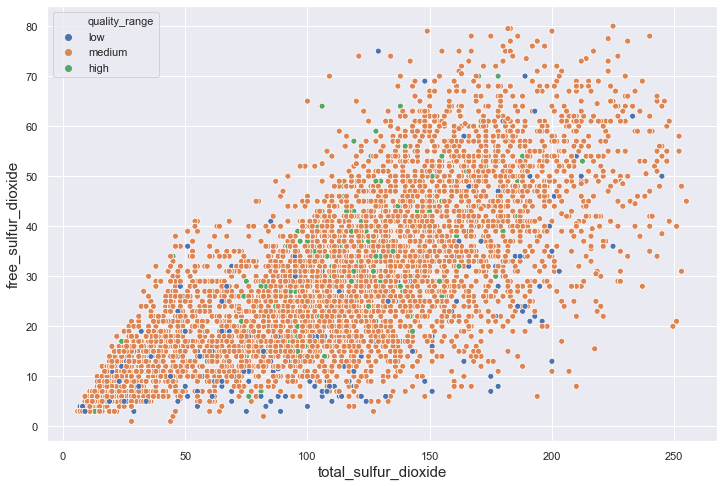

In [107]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='quality_range', data=df_bins);

plt.xlabel('total_sulfur_dioxide', size=15)
plt.ylabel('free_sulfur_dioxide', size=15)

#### pH Level in Wine Quality

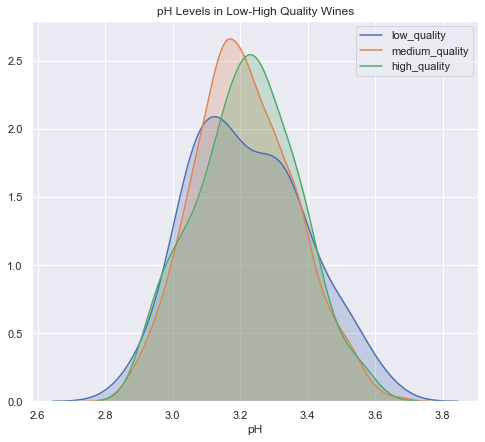

In [108]:
plt.figure(figsize=(8,7))

pH_low_quality = df_bins[df_bins['quality_range']=='low']['pH']
pH_medium_quality = df_bins[df_bins['quality_range']=='medium']['pH']
pH_high_quality = df_bins[df_bins['quality_range']=='high']['pH']

ax = sns.kdeplot(data=pH_low_quality, label='low_quality', shade=True)
ax = sns.kdeplot(data=pH_medium_quality, label='medium_quality', shade=True)
ax = sns.kdeplot(data=pH_high_quality, label='high_quality', shade=True)

plt.title("pH Levels in Low-High Quality Wines")
plt.xlabel('pH')
plt.legend()
plt.show()

#### Density by Wine Quality Classes

<function matplotlib.pyplot.show(*args, **kw)>

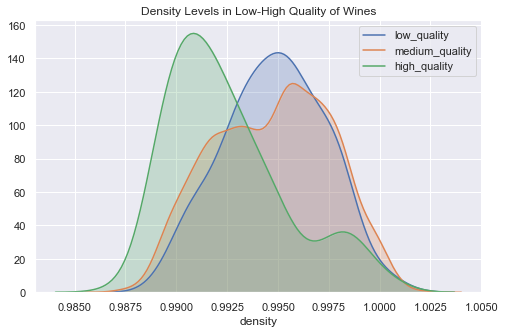

In [109]:
plt.figure(figsize=(8,5))

density_low_quality = df_bins[df_bins['quality_range']=='low']['density']
density_medium_quality = df_bins[df_bins['quality_range']=='medium']['density']
density_high_quality = df_bins[df_bins['quality_range']=='high']['density']

ax = sns.kdeplot(data=density_low_quality, label='low_quality', shade=True)
ax = sns.kdeplot(data=density_medium_quality, label='medium_quality', shade=True)
ax = sns.kdeplot(data=density_high_quality, label='high_quality', shade=True)

plt.title("Density Levels in Low-High Quality of Wines")
plt.xlabel('density')
plt.legend()
plt.show

#### Sulphate Values in Wine Quality Classes

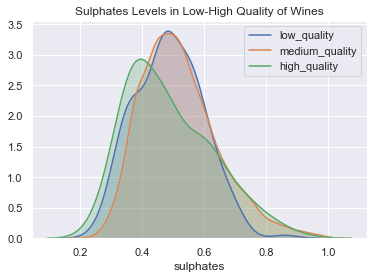

In [110]:
sulphates_low_quality = df_bins[df_bins['quality_range']=='low']['sulphates']
sulphates_medium_quality = df_bins[df_bins['quality_range']=='medium']['sulphates']
sulphates_high_quality = df_bins[df_bins['quality_range']=='high']['sulphates']

ax = sns.kdeplot(data=sulphates_low_quality, label='low_quality', shade=True)
ax = sns.kdeplot(data=sulphates_medium_quality, label='medium_quality', shade=True)
ax = sns.kdeplot(data=sulphates_high_quality, label='high_quality', shade=True)

plt.title("Sulphates Levels in Low-High Quality of Wines")
plt.xlabel('sulphates')
plt.legend()
plt.show()

### General Looking at Wine Quality Classes

#### Creating 2 Bins Model of Two Types of Wine Quality Classes

In [111]:
df_bins = df_mean.copy()

In [112]:
bins = [3, 4, 7, 9]

labels = ['low', 'medium', 'high'] #'low'=0, 'high'=1
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)


df_bins = df_bins.drop('quality', axis=1)

#### Quality in DIfferent Wine Types

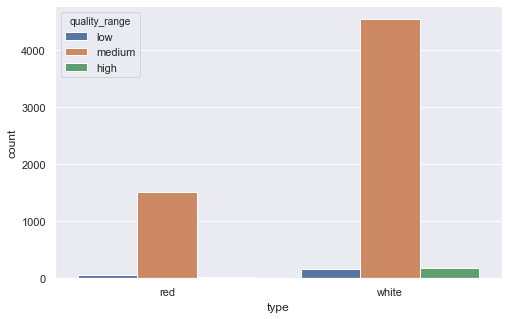

In [113]:
plt.figure(figsize=(8,5))

sns.countplot(x='type', hue='quality_range', data=df_bins)
plt.show()

#### Quality and Alcohol Relation

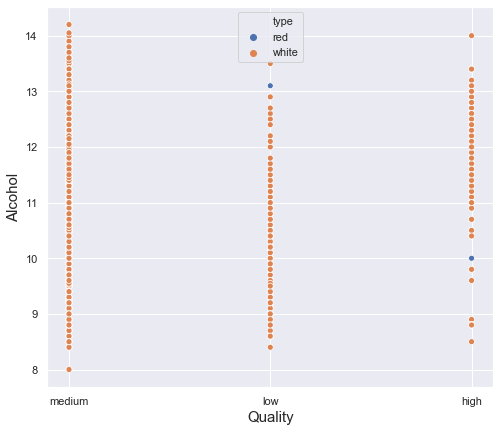

In [114]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

#### Chlorides Level in Quality and wine class

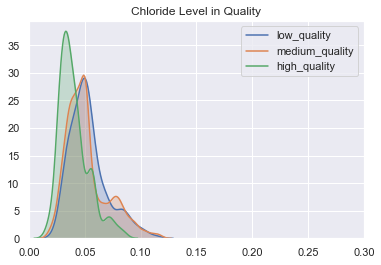

In [115]:
low_quality = df_bins[df_bins['quality_range']=='low']['chlorides']
medium_quality = df_bins[df_bins['quality_range']=='medium']['chlorides']
high_quality = df_bins[df_bins['quality_range']=='high']['chlorides']

ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)
ax = sns.kdeplot(data= medium_quality, label= 'medium_quality', shade=True, color=None)
ax = sns.kdeplot(data= high_quality, label= 'high_quality', shade=True, color=None)

plt.title("Chloride Level in Quality")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

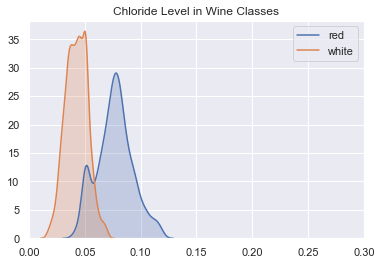

In [116]:
red = df_bins[df_bins['type']=='red']['chlorides']
white = df_bins[df_bins['type']=='white']['chlorides']

ax = sns.kdeplot(data= red, label= 'red', shade=True, color=None)
ax = sns.kdeplot(data= white, label= 'white', shade=True, color=None)

plt.title("Chloride Level in Wine Classes")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

Chloride level is a bit higher in red wine

#### Quality & Volatility Acidity by Types

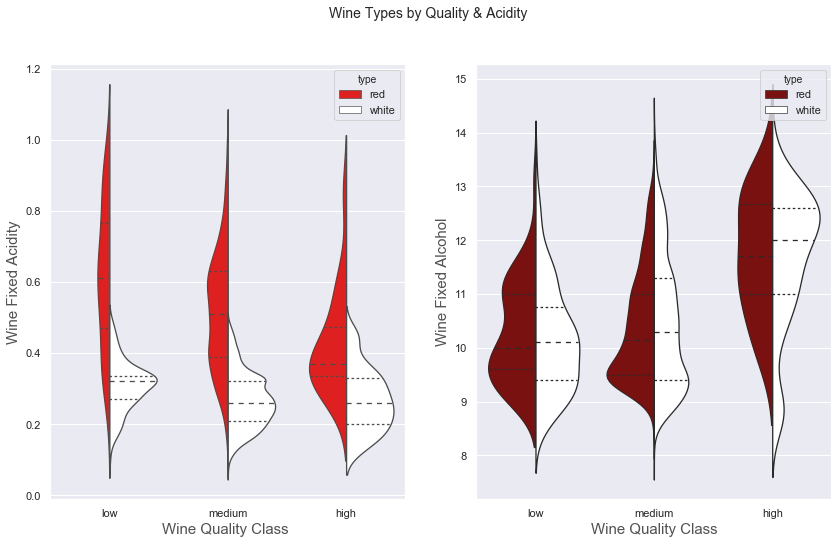

In [117]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

#create left violin plot
sns.violinplot(x='quality_range', y='volatile acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

#create right violin plot
sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)
plt.show()

Fixed acidity level is low on both wine classes, especially in white wine while red wine has more in low quality class up to 1.40. Fixed Alcohol is high on both wine class comparing on both quality. High quality wine has the highest fixed alcohol level in both wine class. High quality wine tend to have low Wine Fixed Acidity and High Fixed Alcohol

#### Fixed Acidity & Volatile Acidity & Citric Acid Density in Quality Classes

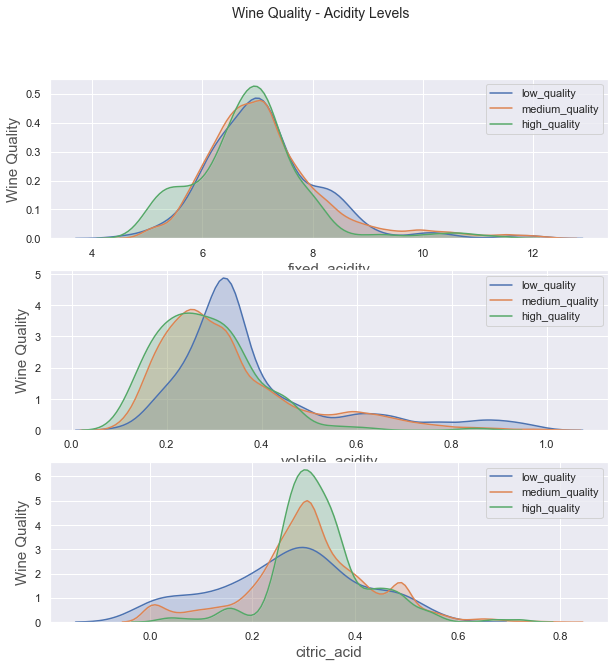

In [118]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)

fixed_acidity_low_quality = df_bins[df_bins['quality_range']=='low']['fixed acidity']
fixed_acidity_medium_quality = df_bins[df_bins['quality_range']=='medium']['fixed acidity']
fixed_acidity_high_quality = df_bins[df_bins['quality_range']=='high']['fixed acidity']

volatile_acidity_low_quality = df_bins[df_bins['quality_range']=='low']['volatile acidity']
volatile_acidity_medium_quality = df_bins[df_bins['quality_range']=='medium']['volatile acidity']
volatile_acidity_high_quality = df_bins[df_bins['quality_range']=='high']['volatile acidity']

citric_acid_low_quality = df_bins[df_bins['quality_range']=='low']['citric acid']
citric_acid_medium_quality = df_bins[df_bins['quality_range']=='medium']['citric acid']
citric_acid_high_quality = df_bins[df_bins['quality_range']=='high']['citric acid']

sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True, ax=ax1)
sns.kdeplot(data=fixed_acidity_medium_quality, label="medium_quality", shade=True, ax=ax1)
sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)
ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)

sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True, ax=ax2)
sns.kdeplot(data=volatile_acidity_medium_quality, label="medium_quality", shade=True, ax=ax2)
sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)
ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)

sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True, ax=ax3)
sns.kdeplot(data=citric_acid_medium_quality, label="medium_quality", shade=True, ax=ax3)
sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)
ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)
ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)

plt.legend()
plt.show()

#### Residual Sugar Levels by Wine Quality Classes

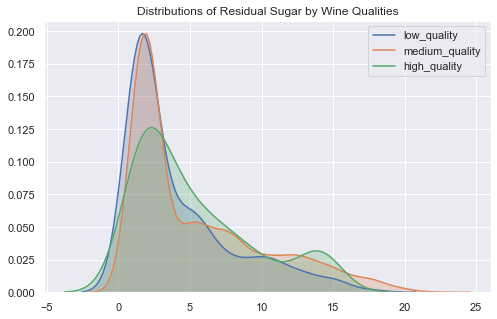

In [119]:
plt.figure(figsize=(8,5))

residual_sugar_low = df_bins[df_bins['quality_range']=='low']['residual sugar']
residual_sugar_medium = df_bins[df_bins['quality_range']=='medium']['residual sugar']
residual_sugar_high = df_bins[df_bins['quality_range']=='high']['residual sugar']

ax = sns.kdeplot(data=residual_sugar_low, label='low_quality', shade=True)
ax = sns.kdeplot(data=residual_sugar_medium, label='medium_quality', shade=True)
ax = sns.kdeplot(data=residual_sugar_high, label='high_quality', shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")
plt.legend()
plt.show()

#### Sulfur Dioxide Distribution in Wine Quality Classes

Text(0, 0.5, 'free_sulfur_dioxide')

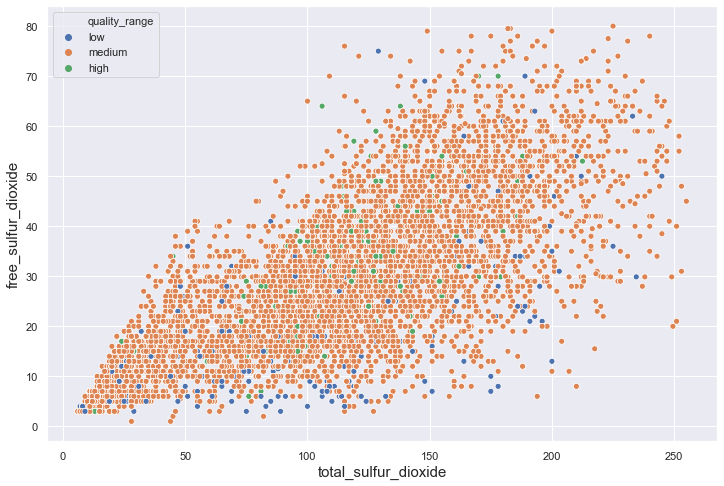

In [120]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', hue='quality_range', data=df_bins);

plt.xlabel('total_sulfur_dioxide', size=15)
plt.ylabel('free_sulfur_dioxide', size=15)

#### pH Level in Wine Quality

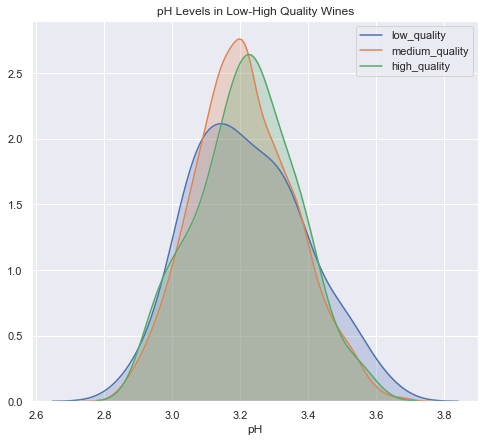

In [121]:
plt.figure(figsize=(8,7))

pH_low_quality = df_bins[df_bins['quality_range']=='low']['pH']
pH_medium_quality = df_bins[df_bins['quality_range']=='medium']['pH']
pH_high_quality = df_bins[df_bins['quality_range']=='high']['pH']

ax = sns.kdeplot(data=pH_low_quality, label='low_quality', shade=True)
ax = sns.kdeplot(data=pH_medium_quality, label='medium_quality', shade=True)
ax = sns.kdeplot(data=pH_high_quality, label='high_quality', shade=True)

plt.title("pH Levels in Low-High Quality Wines")
plt.xlabel('pH')
plt.legend()
plt.show()

#### Density by Wine Quality Classes

<function matplotlib.pyplot.show(*args, **kw)>

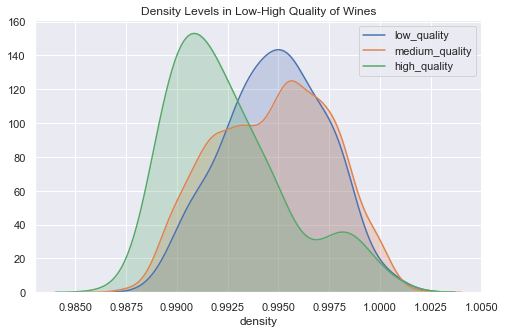

In [122]:
plt.figure(figsize=(8,5))

density_low_quality = df_bins[df_bins['quality_range']=='low']['density']
density_medium_quality = df_bins[df_bins['quality_range']=='medium']['density']
density_high_quality = df_bins[df_bins['quality_range']=='high']['density']

ax = sns.kdeplot(data=density_low_quality, label='low_quality', shade=True)
ax = sns.kdeplot(data=density_medium_quality, label='medium_quality', shade=True)
ax = sns.kdeplot(data=density_high_quality, label='high_quality', shade=True)

plt.title("Density Levels in Low-High Quality of Wines")
plt.xlabel('density')
plt.legend()
plt.show

#### Sulphate Values in Wine Quality Classes

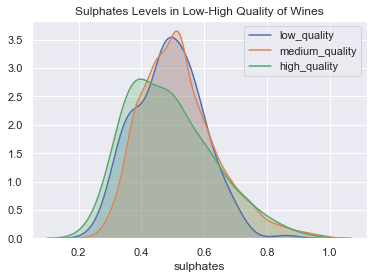

In [123]:
sulphates_low_quality = df_bins[df_bins['quality_range']=='low']['sulphates']
sulphates_medium_quality = df_bins[df_bins['quality_range']=='medium']['sulphates']
sulphates_high_quality = df_bins[df_bins['quality_range']=='high']['sulphates']

ax = sns.kdeplot(data=sulphates_low_quality, label='low_quality', shade=True)
ax = sns.kdeplot(data=sulphates_medium_quality, label='medium_quality', shade=True)
ax = sns.kdeplot(data=sulphates_high_quality, label='high_quality', shade=True)

plt.title("Sulphates Levels in Low-High Quality of Wines")
plt.xlabel('sulphates')
plt.legend()
plt.show()

## 4. Fill missing values

In [124]:
# build function to fill mising values using mean

def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

In [125]:
# make index of null cell

fill_list = (null_cell(df_clean)).index

In [126]:
#fill missing values

df_mean = df_clean.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

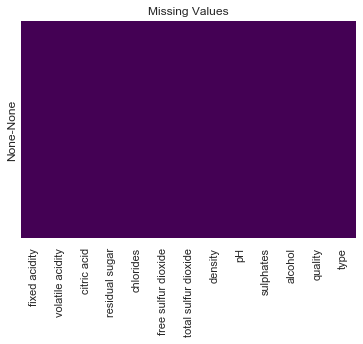

In [127]:
sns.heatmap(df_mean.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.title('Missing Values');

#### Correlation

In [128]:
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

corr_list

Index(['quality', 'alcohol', 'density', 'chlorides', 'volatile acidity',
       'citric acid', 'free sulfur dioxide', 'fixed acidity', 'residual sugar',
       'sulphates', 'total sulfur dioxide', 'pH'],
      dtype='object')

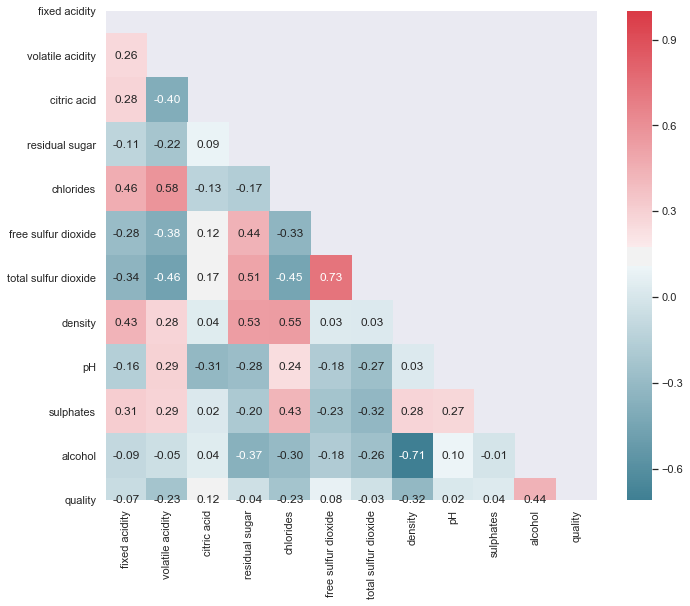

In [129]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=.5)